In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_100000.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_100000.pickle'
TRACKS_DST = 'cache/tracks_100000.pickle'
WORMS_DST = 'cache/worms_100000.pickle'
ARTIFACTS_DST = 'cache/artifacts_100000.pickle'

DOTS_AC = 'cache/dots_100000.h5'
TRACKS_AC = 'cache/tracks_100000.h5'
WORMS_AC = 'cache/worms_100000.h5'
ARTIFACTS_AC = 'cache/artifacts_100000.h5'


def train_and_test(train_set, validation_set, fn):
    autoencoder = original_autoencoder()
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True)

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
3165/3165 [==============================] - 42s 12ms/step - loss: 0.0046 - val_loss: 3.8286e-05
Epoch 2/200
3165/3165 [==============================] - 36s 11ms/step - loss: 3.6133e-05 - val_loss: 6.8693e-05
Epoch 3/200
3165/3165 [==============================] - 38s 12ms/step - loss: 2.2416e-05 - val_loss: 1.8226e-05
Epoch 4/200
3165/3165 [==============================] - 38s 12ms/step - loss: 1.0452e-05 - val_loss: 7.3772e-05
Epoch 5/200
3165/3165 [==============================] - 37s 12ms/step - loss: 9.6846e-06 - val_loss: 1.2015e-05
Epoch 6/200
3165/3165 [==============================] - 36s 11ms/step - loss: 7.6088e-06 - val_loss: 1.7806e-05
Epoch 7/200
3165/3165 [==============================] - 36s 12ms/step - loss: 5.8539e-06 - val_loss: 5.6289e-06
Epoch 8/200
3165/3165 [==============================] - 37s 12ms/step - loss: 4.7127e-06 - val_loss: 6.6587e-05
Epoch 9/200
3165/3165 [=========

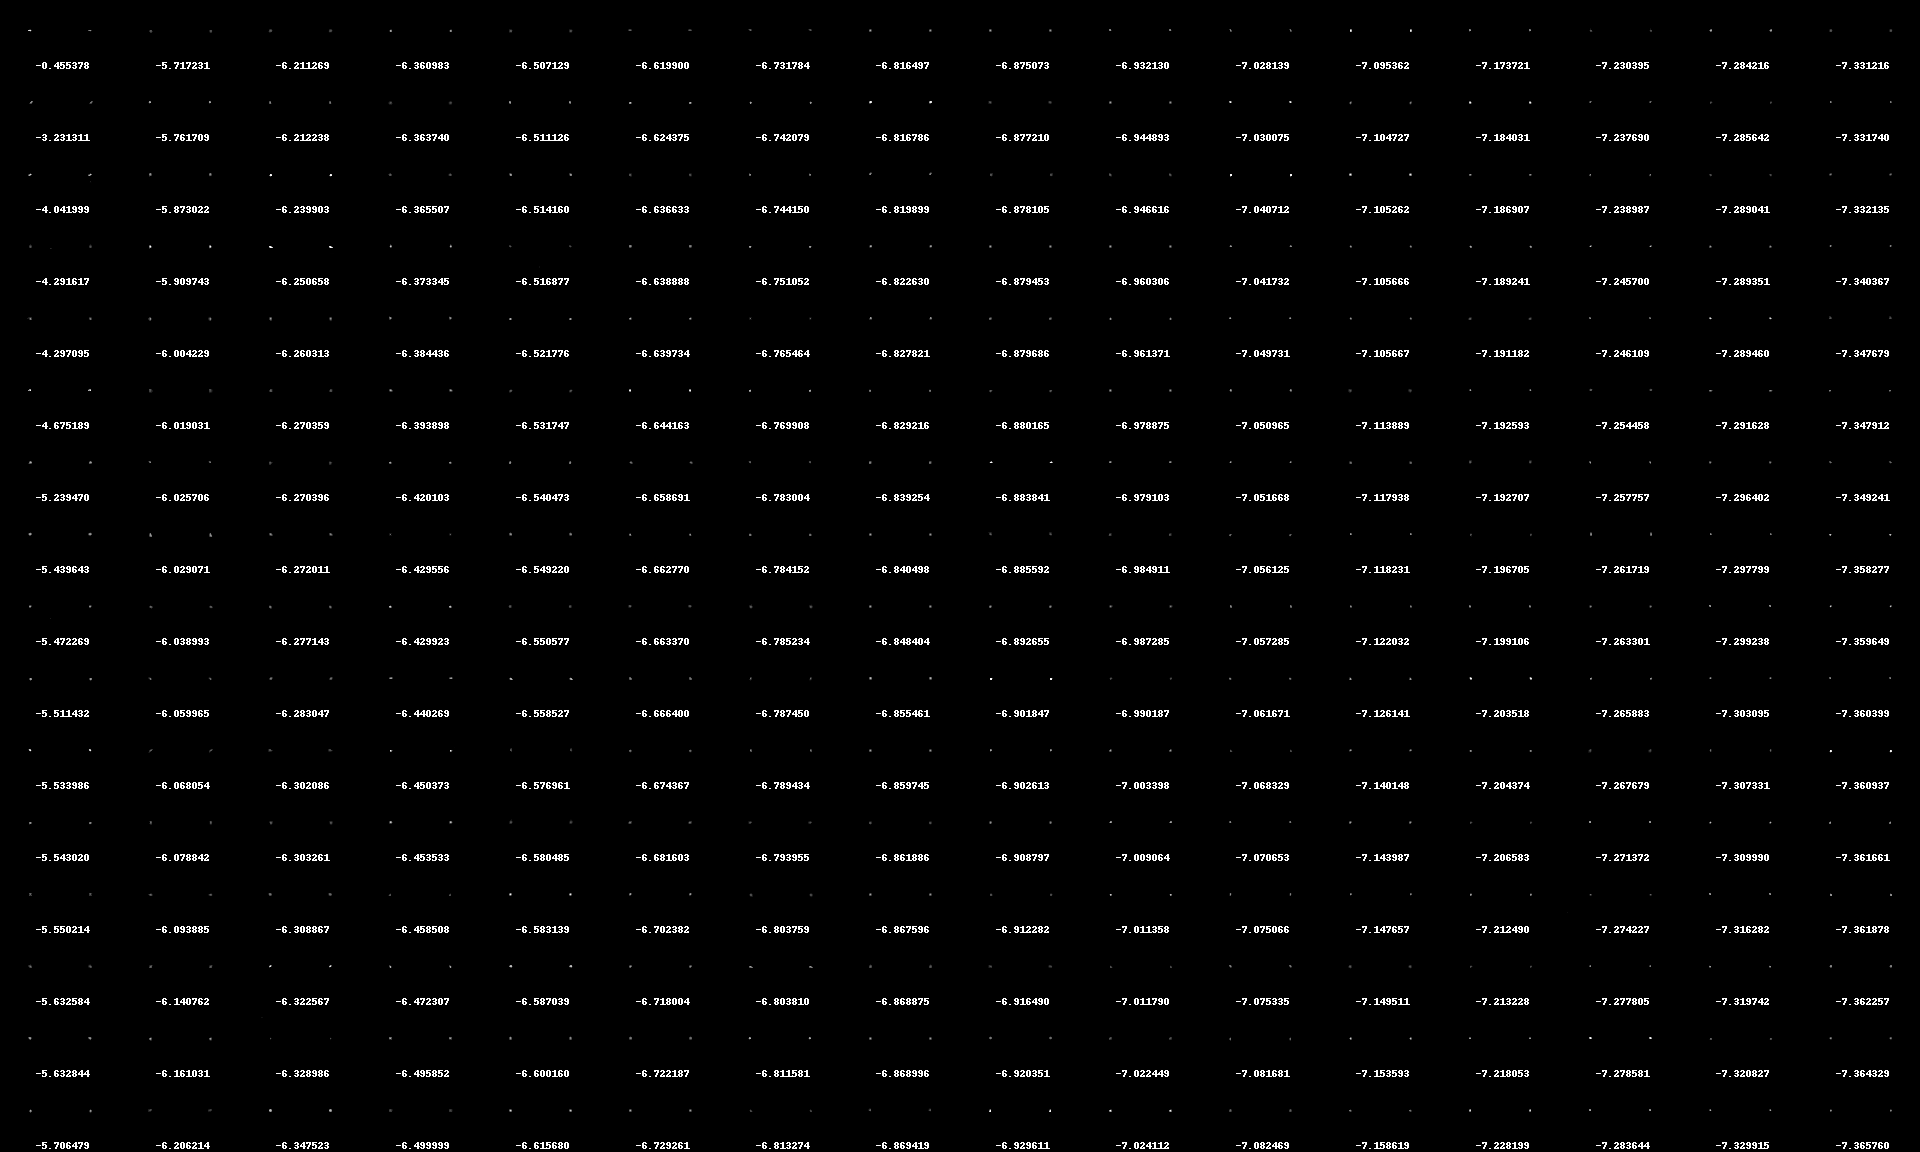

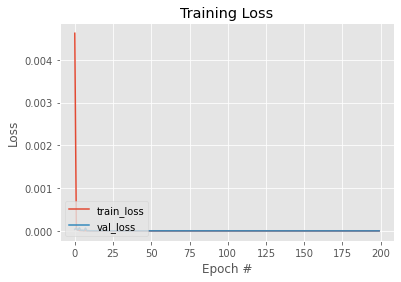

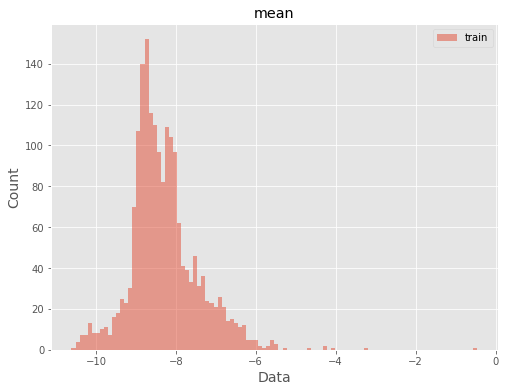

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
3161/3161 [==============================] - 37s 11ms/step - loss: 0.0090 - val_loss: 1.6219e-04
Epoch 2/200
3161/3161 [==============================] - 35s 11ms/step - loss: 1.3476e-04 - val_loss: 9.8205e-05
Epoch 3/200
3161/3161 [==============================] - 36s 11ms/step - loss: 9.8298e-05 - val_loss: 8.4509e-05
Epoch 4/200
3161/3161 [==============================] - 37s 12ms/step - loss: 8.3752e-05 - val_loss: 7.9062e-05
Epoch 5/200
3161/3161 [==============================] - 36s 11ms/step - loss: 7.5348e-05 - val_loss: 6.8631e-05
Epoch 6/200
3161/3161 [==============================] - 36s 11ms/step - loss: 6.9636e-05 - val_loss: 6.7402e-05
Epoch 7/200
3161/3161 [==============================] - 36s 11ms/step - loss: 6.4034e-05 - val_loss: 6.2750e-05
Epoch 8/200
3161/3161 [==============================] - 37s 12ms/step - loss: 5.9103e-05 - val_loss: 6.2820e-05
Epoch 9/200
3161/3161 [=========

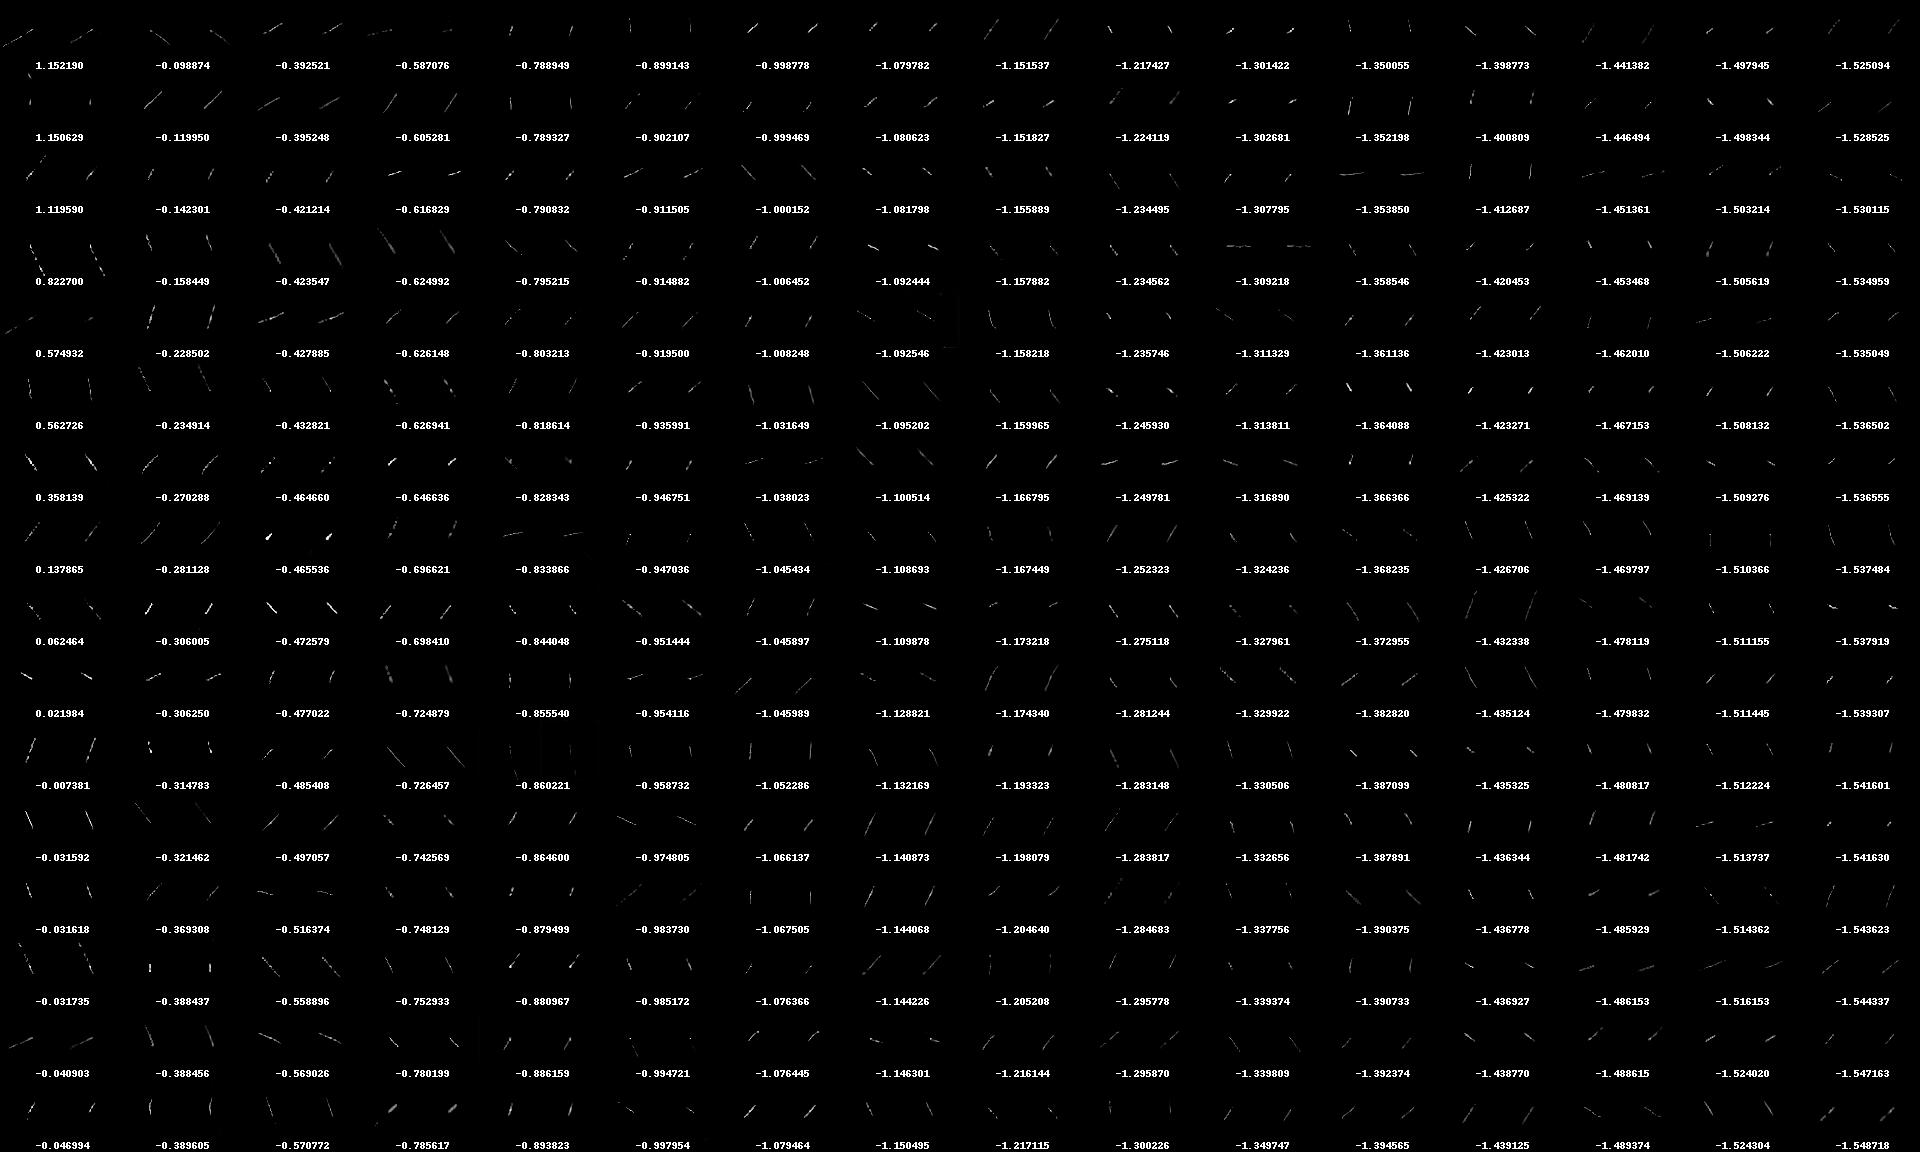

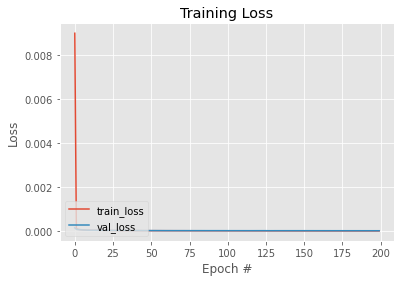

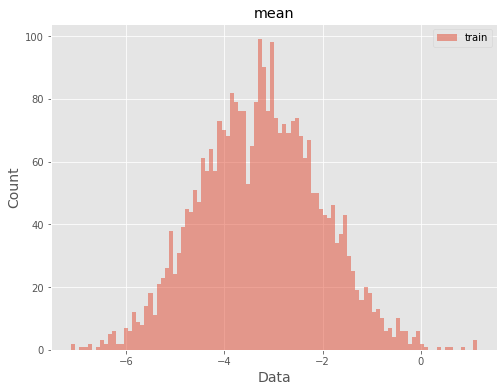

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
3131/3131 [==============================] - 31s 10ms/step - loss: 0.0160 - val_loss: 9.5075e-04
Epoch 2/200
3131/3131 [==============================] - 31s 10ms/step - loss: 9.1183e-04 - val_loss: 6.5116e-04
Epoch 3/200
3131/3131 [==============================] - 31s 10ms/step - loss: 6.8800e-04 - val_loss: 5.8388e-04
Epoch 4/200
3131/3131 [==============================] - 30s 10ms/step - loss: 5.8884e-04 - val_loss: 5.1570e-04
Epoch 5/200
3131/3131 [==============================] - 31s 10ms/step - loss: 5.3716e-04 - val_loss: 4.7507e-04
Epoch 6/200
3131/3131 [==============================] - 31s 10ms/step - loss: 4.8959e-04 - val_loss: 4.6195e-04
Epoch 7/200
3131/3131 [==============================] - 31s 10ms/step - loss: 4.5029e-04 - val_loss: 4.4829e-04
Epoch 8/200
3131/3131 [==============================] - 31s 10ms/step - loss: 4.2314e-04 - val_loss: 4.2829e-04
Epoch 9/200
3131/3131 [=========

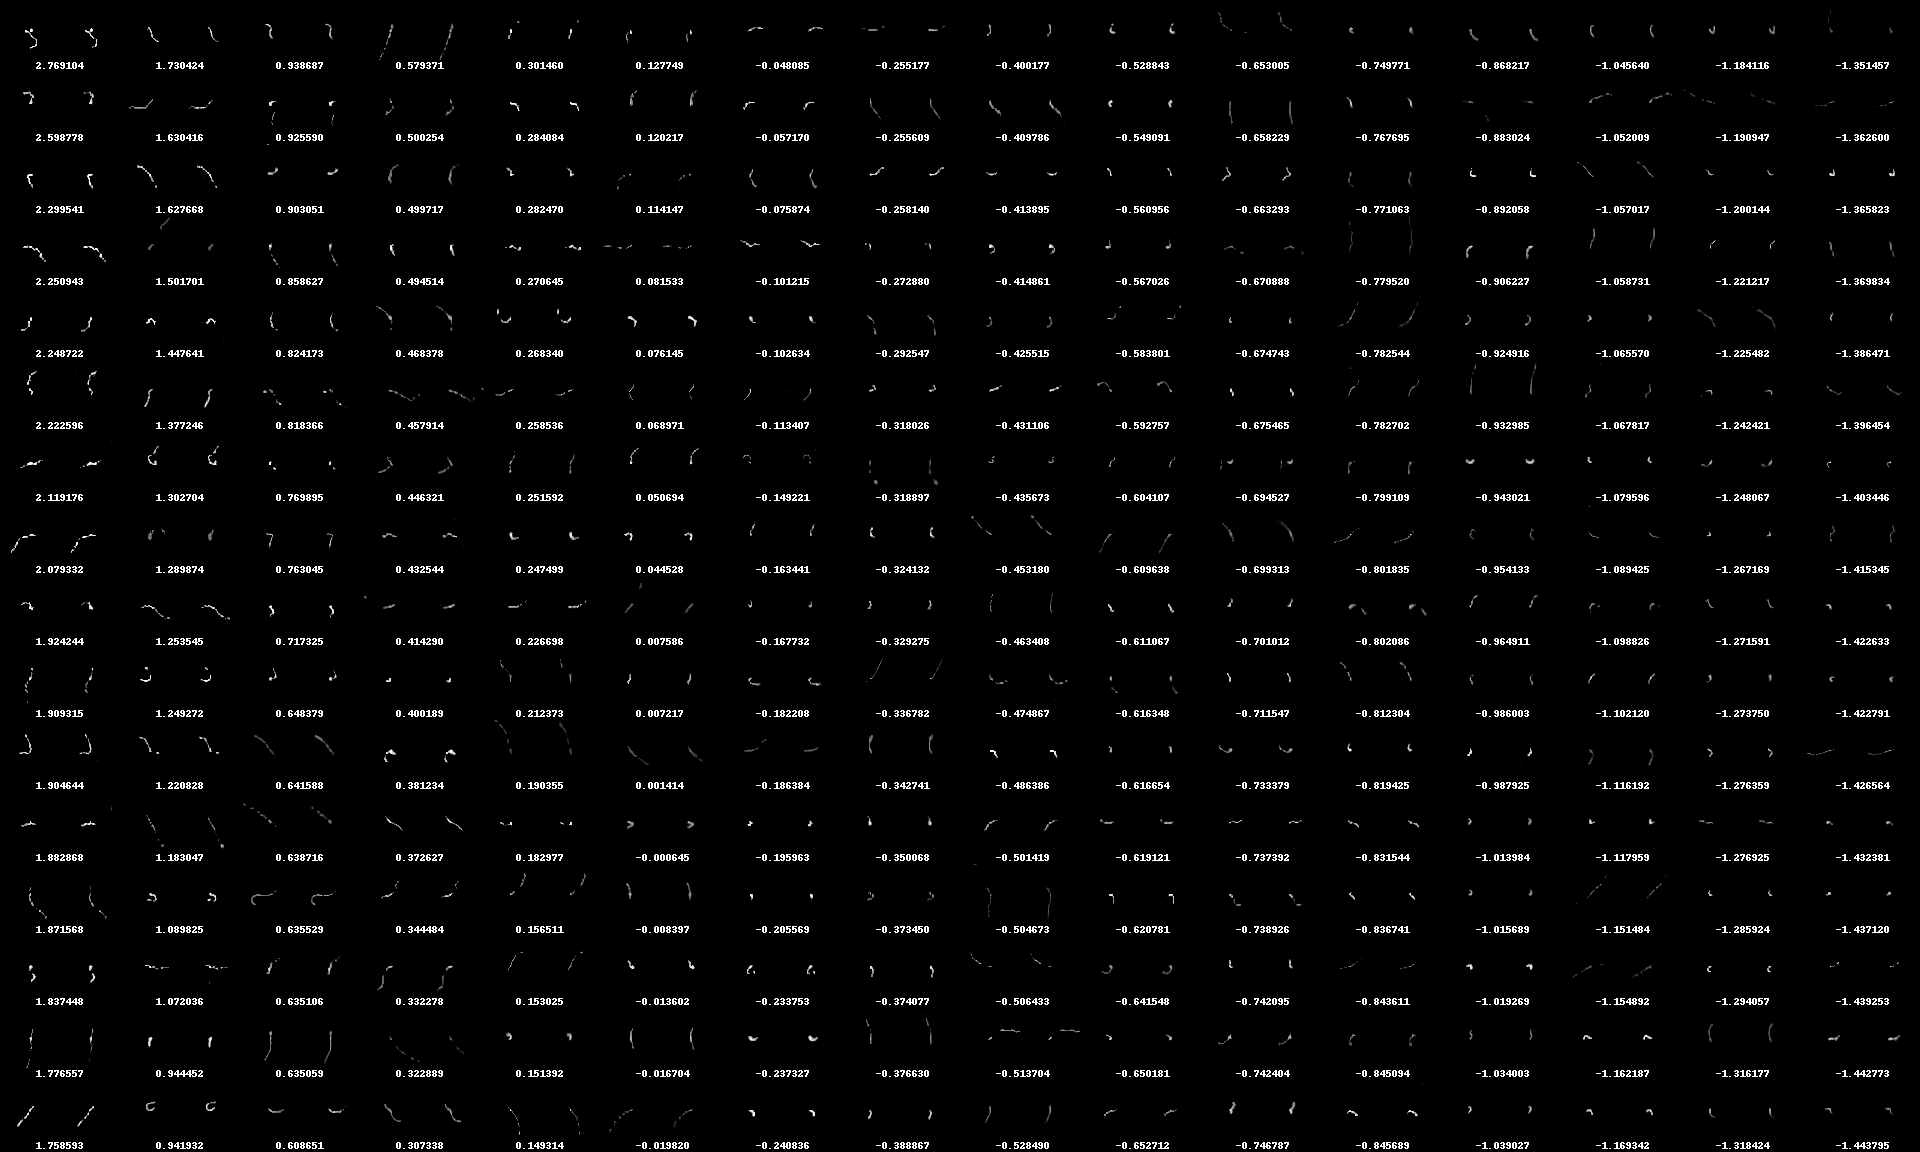

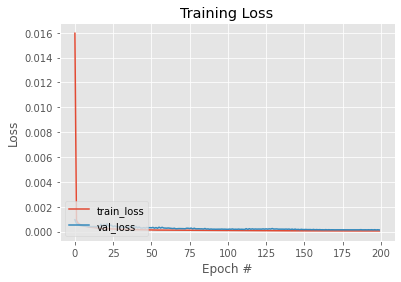

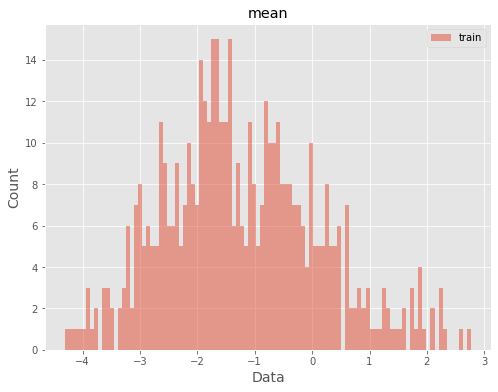

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
230416
244800
0
36928
0
256
18464
0
128
289
Epoch 1/200
3130/3130 [==============================] - 40s 13ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 2/200
3130/3130 [==============================] - 38s 12ms/step - loss: 6.0218e-04 - val_loss: 7.6780e-04
Epoch 3/200
3130/3130 [==============================] - 37s 12ms/step - loss: 4.7613e-04 - val_loss: 6.5625e-04
Epoch 4/200
3130/3130 [==============================] - 37s 12ms/step - loss: 4.1835e-04 - val_loss: 0.0017
Epoch 5/200
3130/3130 [==============================] - 37s 12ms/step - loss: 3.5193e-04 - val_loss: 4.4554e-04
Epoch 6/200
3130/3130 [==============================] - 37s 12ms/step - loss: 3.2140e-04 - val_loss: 4.8383e-04
Epoch 7/200
3130/3130 [==============================] - 38s 12ms/step - loss: 2.9897e-04 - val_loss: 3.5636e-04
Epoch 8/200
3130/3130 [==============================] - 36s 11ms/step - loss: 2.7694e-04 - val_loss: 5.7101e-04
Epoch 9/200
3130/3130 [=================

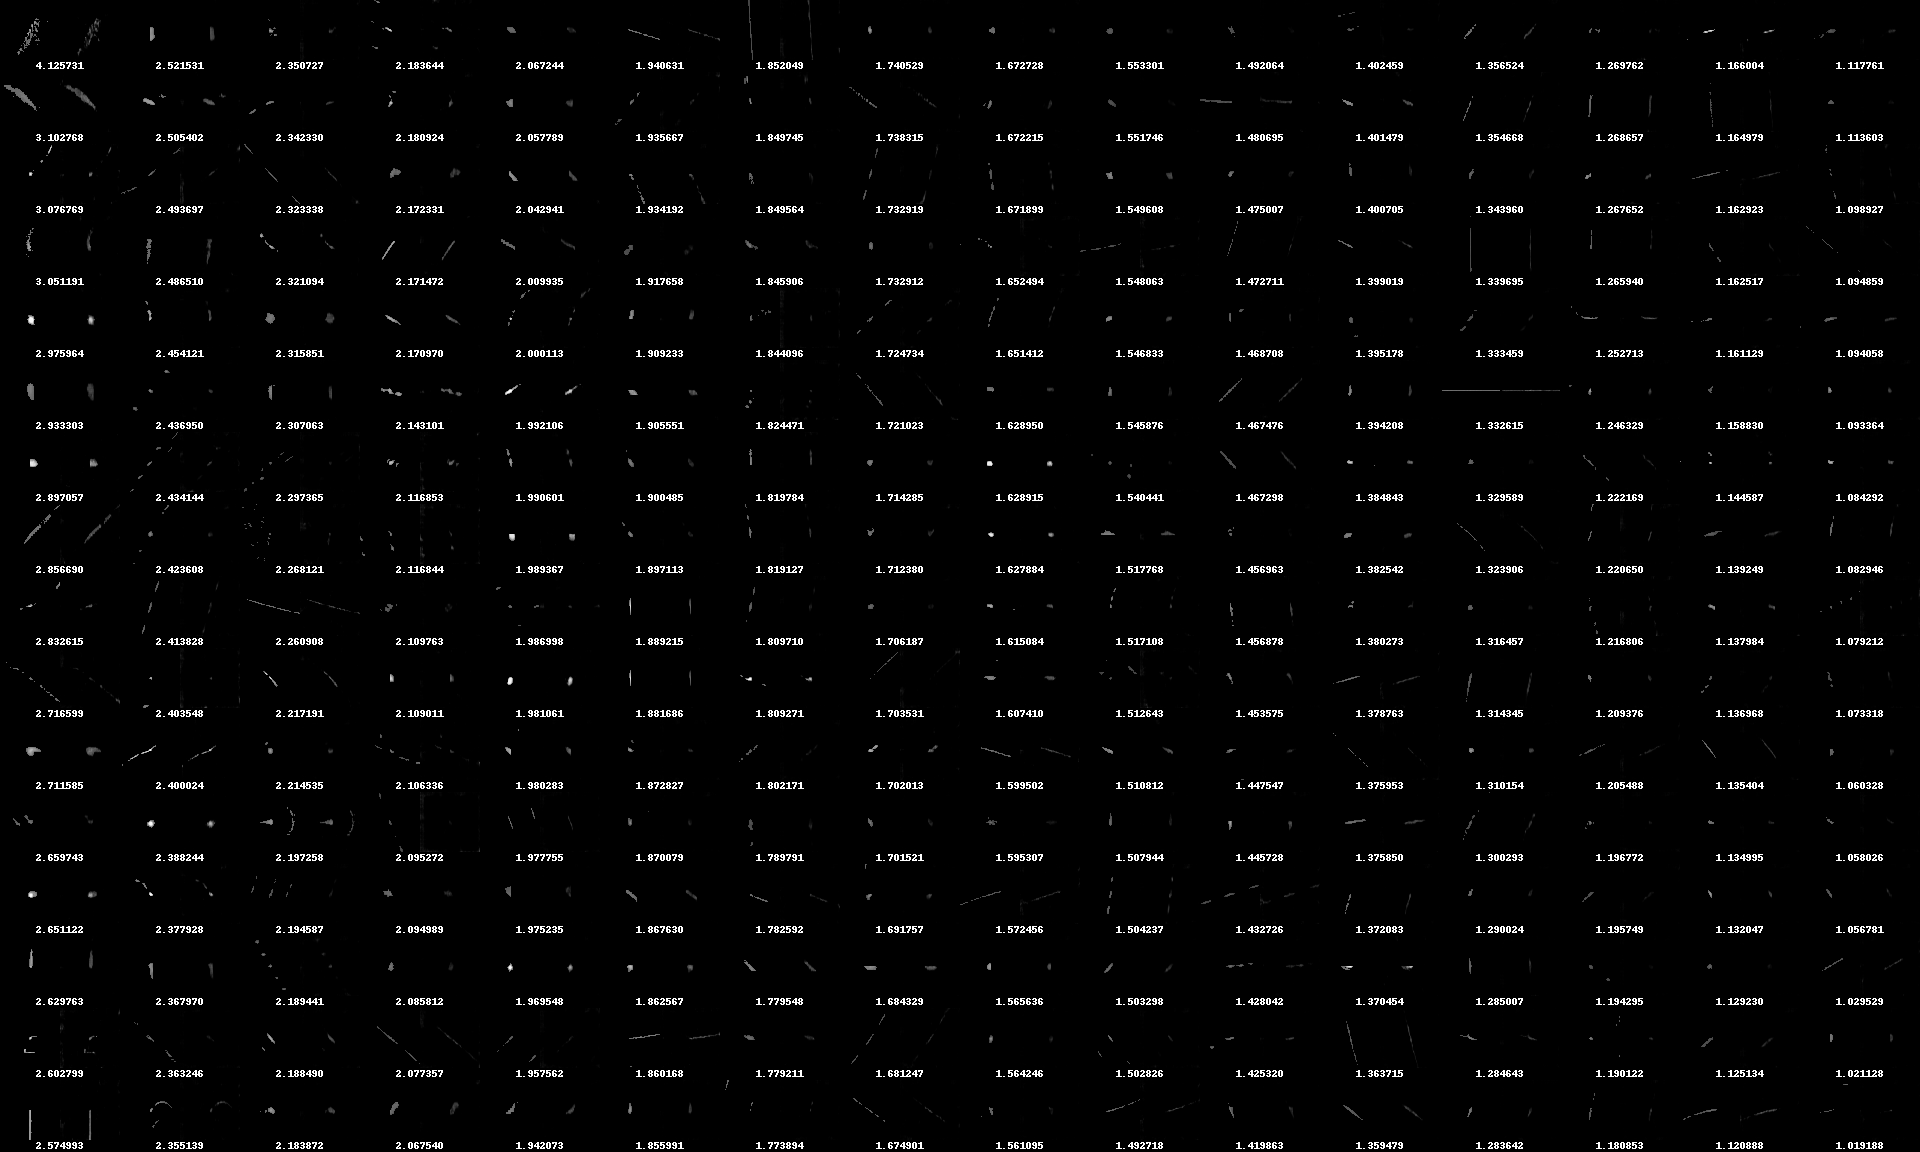

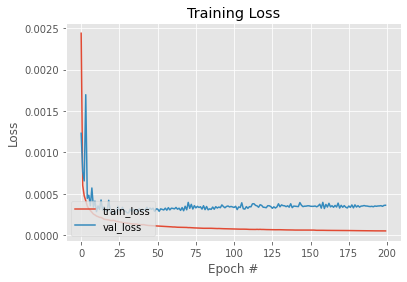

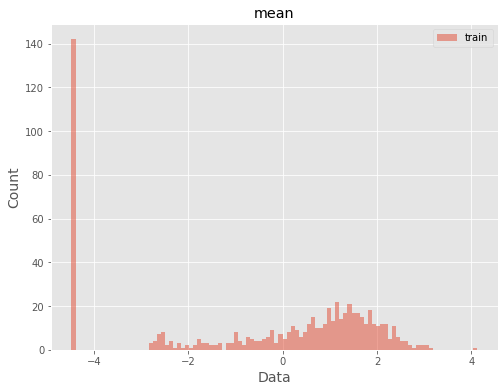

In [7]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)